# Deep Learning Lecture - Exercise 1

This is the first exercise of the Deep Learning Lecture WS 2019. **This assignment is due to 29.10.19 at 23:59.**

Please work through the `IntroductionToColabNotebook.ipynb` before you start with this exercise. 









All exercises during our course are in the form of **Python function**. The function body (name, parameters and returns) is given and you need only to add the functional code. Here is an example:

In [2]:
def example_function(a):
  # TODO
  #return a times two
  return a*2
  pass 

You exercise is now to fullfil the function with *a times two*. Here is how it should look like:



In [3]:
def example_function(a):
  return a * 2

After you write this and run the line, you can use the function:

In [4]:
print("calculate 2.345 times two")
example_function(2.345)

calculate 2.345 times two


4.69

Please solve this exerciese only by adding code within a function when you find the 

```
# TODO
```
statement. Each function you wirte should run without an error. For the evaluation of the exercise we will run automatic tests to grad you. You get only the points for the task if the function runs without an error and works correctly.

The submission procedure is as follows (more on Thursday's session):
  1. We will create a private repository on GitLab for each group.
  2. Each Tuesday we push the new assignment as jupyter notebooks to your repositories (also upload on ILIAS).
  3. You then pull the new assignment.
  4. You provide your solution on the same jupyter notebook and commit and push again to the remote repository.

Now enjoy you first exercise.



## Tensor Manipulation

  1. Arrays, Shapes, Broadcasting  (0.5 p)(bonus)
  2. Eigenvalue decomposition      (2   p)
  3. Vector norms                  (1   p)

1) **Arrays, Shapes, Broadcasting**

After going through the first introduction part about the Colab/Jupyter notebooks, you will now play around with some basics of tensor manipulation in **numpy**. The basic object in numpy is an homogeneous multidimensional array. NumPy’s array class is called **`ndarray`**. Here is a quickstart tutorial: https://numpy.org/devdocs/user/quickstart.html

Each numpy tensor has an attribute `numpy.ndarray.shape` which will output the dimensions of the defined tensor.

In [5]:
import numpy as np

a = np.array(np.arange(4))
b = np.array([2, 2])
print(np.shape(a))
print('a (shape: %s, type: %s): %s'%(a.shape, type(a), a))
print('b (shape: %s, type: %s): %s'%(b.shape, type(b), b))

(4,)
a (shape: (4,), type: <class 'numpy.ndarray'>): [0 1 2 3]
b (shape: (2,), type: <class 'numpy.ndarray'>): [2 2]


In order to perform matrix multiplication and addition in numpy there are two methods: [`numpy.matmul`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) and [`numpy.add`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.add.html). Please read their respective documentation in numpy before proceding.
 
Try executing the following cells:

In [6]:
np.matmul(a, b)

ValueError: shapes (4,) and (2,) not aligned: 4 (dim 0) != 2 (dim 0)

In [7]:
np.add(a, b)

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

As you can see, we get a `ValueError` due to the shape mismatch between the two numpy arrays we want to multiply/add. In order to deal with different array shapes during arithmetic operations, we can either reshape the arrays or broadcast the smaller array across the larger one such that they have compatible shapes.

 * https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
 * https://docs.scipy.org/doc/numpy/user/theory.broadcasting.html#array-broadcasting-in-numpy

In [8]:
# reshape a from (4,) to (2,2)
print("matmul reshape")
print(np.matmul(a.reshape([2, 2]), b))

# broadcst a across b in order to add two numpy arrays with different shapes
print("broadcast")
print(np.add(a.reshape([2, 2]), b))

matmul reshape
[ 2 10]
broadcast
[[2 3]
 [4 5]]


In [9]:
# NOTE: using * instead of numpy.matmul will broadcast a across b and multiply element-wise the respective values
print(a.reshape([2, 2]) * b)

[[0 2]
 [4 6]]


In order to create a diagonal matrix when given a 1D numpy array use [`numpy.diag`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html). For transposing a ndarray use [`numpy.transpose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) or the method `numpy.ndarray.T`:

In [10]:
# create diagonal matrix given a 1D array
print("diag")
print(np.diag(b))

# transpose of matrix
print("transpose")
print(np.transpose(a.reshape([2, 2])))

# equivalent with np.transpose
print("transpose 2")
print(a.reshape([2, 2]).T)

diag
[[2 0]
 [0 2]]
transpose
[[0 2]
 [1 3]]
transpose 2
[[0 2]
 [1 3]]


Now we will jump directly to the first task for this assignment. 

2) **Eigenvalue decomposition**

Using [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can also perform many linear algebra functionalities. Given the following matrix:

In [11]:
A = .25 * np.array([[7, -np.sqrt(3)], [-np.sqrt(3), 5]])
A

array([[ 1.75     , -0.4330127],
       [-0.4330127,  1.25     ]])

The eigenvalue decomposition $A = Q\Lambda Q^T$ with $\Lambda = diag(\lambda_1, \lambda_2$) is done via [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html):

In [12]:
import numpy.linalg as LA
eigval, eigvec = LA.eig(A)
print(eigval)
print(eigvec)

[2. 1.]
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


a) Write a function that returns the square matrix given the eigenvalues and the eigenvectors as an input.

In [13]:

def matrix_from_eigdec(e:np.ndarray=eigval, v:np.ndarray=eigvec) -> np.ndarray:
  # TODO  
  D = np.diag([e[0],e[1]]) 
  Q = v
  return Q @ D @ np.linalg.inv(Q)
  #pass

A_ = matrix_from_eigdec()
A_

array([[ 1.75     , -0.4330127],
       [-0.4330127,  1.25     ]])

b) Show that the columns of $Q$ are orthonormal, i.e. the columns are of unit length and orthogonal (dot product is 0).

In [14]:
def test_orthonormal(v: np.ndarray=eigvec) -> (float, float, float):
  # TODO
  Q = v
  print(Q)
  print(Q[:,0])
  
  norm1 = np.linalg.norm(Q[:,0])
  norm2 = np.linalg.norm(Q[:,1])
  dot = np.dot(Q[:,0],Q[:,1])
  return norm1, norm2, dot
  pass

norm_1, norm_2, dot = test_orthonormal()

assert(norm_1 == 1. and norm_2 == 1. and dot == 0.)

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
[ 0.8660254 -0.5      ]


c) Show that the matrix $Q\Lambda^{-1}Q^T$ with $\Lambda^{-1} = diag(\lambda^{-1}_1, \lambda^{-1}_2)$ is the inverse of $A$. The inverse of a matrix in nunmpy is computed via [numpy.linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html).

In [15]:
def inverse(e:np.ndarray=eigval, v:np.ndarray=eigvec) -> np.ndarray:
  # TODO
  D = np.diag([e[0],e[1]])
  Q = v
  return Q@LA.inv(D)@np.transpose(Q)
  pass

print(LA.inv(A))
print(inverse())

[[0.625      0.21650635]
 [0.21650635 0.875     ]]
[[0.625      0.21650635]
 [0.21650635 0.875     ]]


3) **Vector norms**

The length of a vector is not a single number but can be defined in different way. These vector norms share common properties but also have different characteristics.

In numpy you can use the [`numpy.linalg.norm` ](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)function to compute the $L_p$ norm of a numpy array, where $p\geq 1$. More formally, the $L_p$ norm of a vector $x$ is defined as: $$\| x \|_p = (\sum_{i=1}^{n} | x_i |^p)^{1/p} $$ For $p=1$ we get the Manhattan norm, $p=2$ we get the Euclidian norm and for $p=\infty$ we approximate the maximum norm: $\| x \|_{\infty} = \max_i | x_i |$. 

In [19]:
# Data for a three-dimensional line
x_1 = np.linspace(-10, 10, 100)
x_2 = np.linspace(.10, 10, 100)

X_1, X_2 = np.meshgrid(x_1, x_2)
print(np.shape(X_1)[1])
print(np.size(X_1))

100
10000


Write a function that computes the norm of each 2D vector composed by the element i-th elements of $X\_1$ and $X\_2$.

In [29]:
# the shape of the array this function returns should be the same as the shapes of X_1 and X_2
def L_norm(x1: np.ndarray =X_1, x2: np.ndarray =X_2, p: int =2) -> np.ndarray:
  # TODO
  x_1 = X_1.reshape(1,-1)
  x_2 = X_2.reshape(1,-1)
  x_3 = np.stack((x_1,x_2))
  norm_x1_x2 = np.linalg.norm(x_3,axis=0,ord=p)
  return norm_x1_x2.reshape(100,100)    
  pass

In [30]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def plot(x, y, z, p=1):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.contour3D(X_1, X_2, Z, 500, cmap='Greens')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('z')
  ax.set_title('p=%d'%p)
  plt.show()

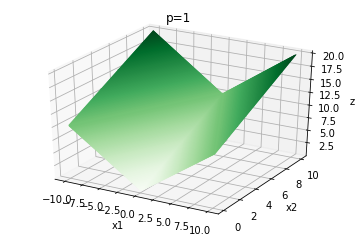

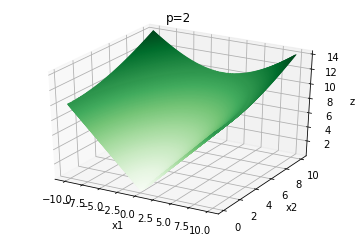

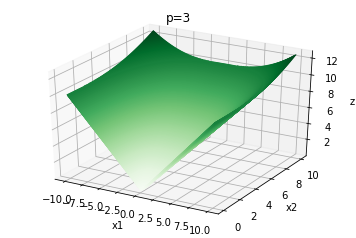

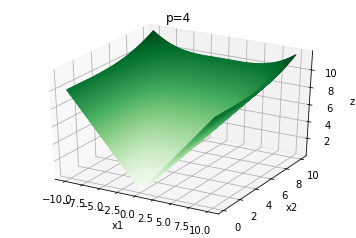

[[10.00000003  9.79797982  9.59595962 ...  9.59595962  9.79797982
  10.00000003]
 [10.0000004   9.79798022  9.59596005 ...  9.59596005  9.79798022
  10.0000004 ]
 [10.00000202  9.79798195  9.59596189 ...  9.59596189  9.79798195
  10.00000202]
 ...
 [11.77495188 11.65302869 11.53482057 ... 11.53482057 11.65302869
  11.77495188]
 [11.83305896 11.71296011 11.59659378 ... 11.59659378 11.71296011
  11.83305896]
 [11.89207115 11.77378742 11.65925094 ... 11.65925094 11.77378742
  11.89207115]]


In [32]:
for p in range(1, 5):
  Z = L_norm(X_1, X_2, p)
  plot(X_1, X_2, Z, p)
print(Z)